Easy - Q1

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df_customer = pd.read_json(r'C:\Users\zakil\Documents\vscoding\dim_customer.json')
df_invoice = pd.read_csv(r'C:\Users\zakil\Documents\vscoding\fct_invoice.csv')
unique_customers = df_customer['id'].nunique()
print('Unique Customers: ' + str(unique_customers))

Unique Customers: 5191


Easy - Q2

In [13]:
df_customer = pd.read_json(r'C:\Users\zakil\Documents\vscoding\dim_customer.json')
df_invoice = pd.read_csv(r'C:\Users\zakil\Documents\vscoding\fct_invoice.csv')
unique_products = df_invoice['category'].unique()
number_unique_products = df_invoice['category'].nunique() 
print('Unique Products: ' + str(unique_products))
print('Number of Unique Products ' + str(number_unique_products))

Unique Products: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of Unique Products 8


Easy - Q3

In [14]:
df_customer = pd.read_json(r'C:\Users\zakil\Documents\vscoding\dim_customer.json')
df_invoice = pd.read_csv(r'C:\Users\zakil\Documents\vscoding\fct_invoice.csv')
payment_counts = df_invoice['payment_method'].value_counts()
payment_counts = payment_counts.sort_values(ascending=False)
print('The most popular payment method was: ' + str(payment_counts.index[0]))
print('This payment method was used ' + str(payment_counts.iloc[0]) + ' times')

The most popular payment method was: Cash
This payment method was used 44447 times


Medium - Q1

In [15]:
df_customer = pd.read_json(r'C:\Users\zakil\Documents\vscoding\dim_customer.json')
df_invoice = pd.read_csv(r'C:\Users\zakil\Documents\vscoding\fct_invoice.csv')
category_sales = df_invoice.groupby('category')['quantity'].sum()
category_sales = category_sales.sort_values(ascending=False)
top_sales = category_sales.head(3)
print('The 3 highest selling categories in order are: ')
for category, sales in top_sales.items():
    print(category, "-", sales)

The 3 highest selling categories in order are: 
Clothing - 103558
Cosmetics - 45465
Food & Beverage - 44277


Medium - Q2

In [16]:
df_customer = pd.read_json(r'C:\Users\zakil\Documents\vscoding\dim_customer.json')
df_invoice = pd.read_csv(r'C:\Users\zakil\Documents\vscoding\fct_invoice.csv')
df_customer = df_customer[['id', 'age']]
df_invoice = df_invoice[['customer_id', 'quantity']]
df_customer = df_customer.rename({'id': 'customer_id'}, axis='columns')
newdf = df_customer.merge(df_invoice, how='right')
fortyfive = newdf['age'] > 45
newdf = newdf[fortyfive]
sales_sum = newdf['quantity'].sum()
print(sales_sum)

97629


Medium - Q3

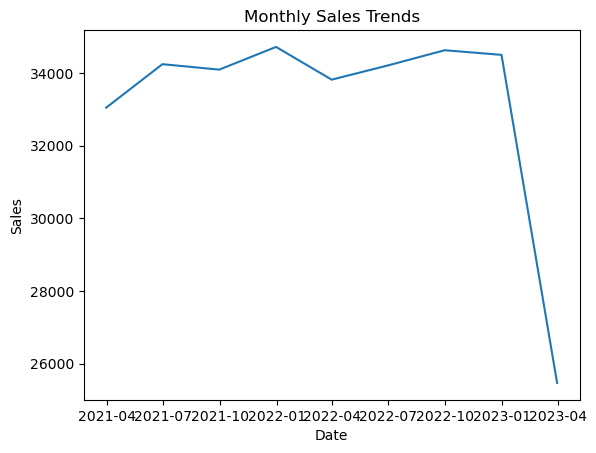

  invoice_date  quantity
0   2021-03-31     33045
1   2021-06-30     34242
2   2021-09-30     34092
3   2021-12-31     34717
4   2022-03-31     33816
5   2022-06-30     34207
6   2022-09-30     34626
7   2022-12-31     34498
8   2023-03-31     25469


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df_customer = pd.read_json(r'C:\Users\zakil\Documents\vscoding\dim_customer.json')
df_invoice = pd.read_csv(r'C:\Users\zakil\Documents\vscoding\fct_invoice.csv')
df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'], format="%d/%m/%Y")
invoices_received = df_invoice[['invoice_date', 'quantity']]
invoices_received = invoices_received.groupby('invoice_date')['quantity'].sum()
new_invoices = pd.DataFrame(invoices_received)
df_monthly = new_invoices.resample('Q').sum()
df_monthly = df_monthly.reset_index()
date = df_monthly['invoice_date']
inv = df_monthly['quantity']
plt.plot(date, inv)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends')
plt.show()
print(df_monthly)

Data Shows sum of sales at the end of every quarter, this can be swapped between monthly/quarterly/yearly by changing the 'Q' in "df_monthly = new_invoices.resample('Q').sum()" to 'M' or 'Y'. Trends seem to indicate that the month of February tends to exhibit a drop in sales

Hard - Q1

In [11]:
df7 = df_customer.rename(columns={'id':'customer_id'})
df8 = df_invoice
new_table = df7.merge(df8)

new_table = new_table.dropna(axis=0)
def decade_range(qqq):
    return(str((qqq // 10) * 10) + '-'+ str((qqq // 10) * 10 + 9))

new_table.replace("null", None, inplace=True)

new_table['decade range'] = new_table['age'].apply(decade_range)
new_table = new_table[['category', 'quantity', 'decade range']]
pivottable = pd.pivot_table(new_table, index = 'category', columns = ['decade range'], values = 'quantity', aggfunc = 'sum')
print(pivottable)

decade range     10.0-19.0  20.0-29.0  30.0-39.0  40.0-49.0  50.0-59.0  \
category                                                                 
Books                  229       1427       1518       1542       1364   
Clothing              1727       9392      10247      10220       9343   
Cosmetics              730       4060       4871       4460       3958   
Food & Beverage        697       3906       4540       4677       3824   
Shoes                  457       2716       3186       3148       2652   
Souvenir               281       1304       1496       1514       1286   
Technology             274       1359       1590       1553       1162   
Toys                   480       2859       3217       2983       2626   

decade range     60.0-69.0  70.0-79.0  80.0-89.0  
category                                          
Books                 1420       1019        500  
Clothing              9700       7055       4095  
Cosmetics             4344       2807       1752  
Food